<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [12]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn+(1).csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
len(df.columns)

21

In [18]:
df.loc[20]

customerID                8779-QRDMV
gender                          Male
SeniorCitizen                      1
Partner                           No
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                 Yes
TechSupport                       No
StreamingTV                       No
StreamingMovies                  Yes
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 39.65
TotalCharges                   39.65
Churn                            Yes
Name: 20, dtype: object

In [31]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
feats = list(df)[0:20]
target = list(df)[20]

X = df[feats]
y = df[ target]

# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4930, 20) (2113, 20) (4930,) (2113,)


In [27]:
# prepare input data
import category_encoders as ce

def prepare_inputs(X_train, X_test):
	oe = ce.OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [29]:
# Use ordinal encoder to encode categorical data in feature sets

X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

In [30]:
X_train_enc

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1768,1,1,0,1,1,63,1,1,1,1,1,1,1,1,1,1,1,1,58.55,1
3556,2,2,0,2,2,6,1,1,2,2,2,2,2,2,2,1,1,2,19.45,2
6018,3,2,0,1,1,33,1,1,2,2,2,2,2,2,2,2,1,2,20.35,3
2840,4,1,0,2,2,23,1,1,3,3,3,3,3,1,3,3,1,2,84.40,4
6705,5,2,0,2,2,22,1,1,1,1,1,3,3,1,3,3,2,3,51.10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,4926,2,0,1,1,39,1,1,1,1,1,3,3,1,3,2,2,4,49.80,4631
3441,4927,1,0,2,2,34,1,1,1,3,3,1,1,1,3,1,2,2,60.80,4632
1344,4928,1,0,2,1,28,1,1,2,2,2,2,2,2,2,3,1,2,20.50,4633
4623,4929,2,1,2,1,69,1,2,3,1,3,1,1,1,1,3,2,4,95.35,4634


In [33]:
# Use Ordinal encoder to convert target into integers

y_train_enc, y_test_enc = prepare_inputs(y_train, y_test)
y_train_enc['Churn'].value_counts()

1    3618
2    1312
Name: Churn, dtype: int64

In [36]:
# Normalize X_train set
from sklearn.preprocessing import Normalizer, MinMaxScaler

col= X_train_enc.columns

transformer = MinMaxScaler().fit(X_train_enc)  
X_train_norm= transformer.transform(X_train_enc)
X_train_norm= pd.DataFrame(X_train_norm, columns=col)
X_train_norm.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.000000,0.0,0.0,0.0,0.0,0.875000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.400995,0.000000
1,0.000203,1.0,0.0,1.0,1.0,0.083333,0.0,0.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.333333,0.011940,0.000216


In [37]:
# Normalize X_test set

transformer1 = MinMaxScaler().fit(X_test_enc)  
X_test_norm= transformer1.transform(X_test_enc)
X_test_norm= pd.DataFrame(X_test_norm, columns=col)
X_test_norm.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,1.0,0.0,0.430556,0.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.333333,0.609634,0.0
1,0.0,0.0,0.0,0.0,0.0,0.027778,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.666667,0.624185,0.0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [65]:
# Define model with a function

def build_model():
    model = Sequential()
    model.add(Dense(50, input_dim = 20, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(1, activation ='sigmoid'))   

    model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
    return model

In [66]:
model = build_model();
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                1050      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [67]:
y_train_enc['Churn'].value_counts(),y_test_enc['Churn'].value_counts(),

(1    3618
 2    1312
 Name: Churn, dtype: int64,
 1    1556
 2     557
 Name: Churn, dtype: int64)

In [68]:
# Fit model
churn = model.fit(X_train_norm, y_train_enc,
                  epochs = 20, 
                  batch_size = 32, 
                  validation_data=(X_test_norm, y_test_enc),                   
                  verbose = 2
                   )

Epoch 1/20
155/155 - 0s - loss: 0.2976 - mae: 0.3048 - mse: 0.2976 - val_loss: 0.2639 - val_mae: 0.2642 - val_mse: 0.2639
Epoch 2/20
155/155 - 0s - loss: 0.2663 - mae: 0.2665 - mse: 0.2663 - val_loss: 0.2637 - val_mae: 0.2638 - val_mse: 0.2637
Epoch 3/20
155/155 - 0s - loss: 0.2662 - mae: 0.2663 - mse: 0.2662 - val_loss: 0.2636 - val_mae: 0.2637 - val_mse: 0.2636
Epoch 4/20
155/155 - 0s - loss: 0.2662 - mae: 0.2662 - mse: 0.2662 - val_loss: 0.2636 - val_mae: 0.2637 - val_mse: 0.2636
Epoch 5/20
155/155 - 0s - loss: 0.2661 - mae: 0.2662 - mse: 0.2661 - val_loss: 0.2636 - val_mae: 0.2636 - val_mse: 0.2636
Epoch 6/20
155/155 - 1s - loss: 0.2661 - mae: 0.2662 - mse: 0.2661 - val_loss: 0.2636 - val_mae: 0.2636 - val_mse: 0.2636
Epoch 7/20
155/155 - 0s - loss: 0.2661 - mae: 0.2661 - mse: 0.2661 - val_loss: 0.2636 - val_mae: 0.2636 - val_mse: 0.2636
Epoch 8/20
155/155 - 0s - loss: 0.2661 - mae: 0.2661 - mse: 0.2661 - val_loss: 0.2636 - val_mae: 0.2636 - val_mse: 0.2636
Epoch 9/20
155/155 - 0s 

In [69]:
model_churn= pd.DataFrame(churn.history)
model_churn['epoch']= model_churn.index.values
model_churn.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,0.297574,0.304831,0.297574,0.263852,0.264214,0.263852,0
1,0.266260,0.266464,0.266260,0.263681,0.263805,0.263681,1
2,0.266175,0.266252,0.266175,0.263639,0.263698,0.263639,2
3,0.266152,0.266194,0.266152,0.263623,0.263656,0.263623,3
4,0.266142,0.266170,0.266142,0.263616,0.263636,0.263616,4


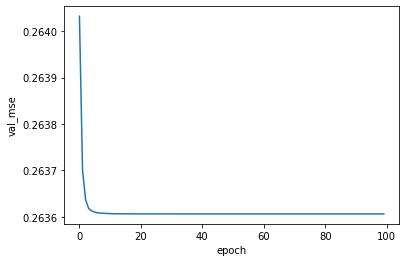

In [59]:
import seaborn as sns

sns.lineplot(x = 'epoch', y = 'val_mse' , data = model_churn);

In [64]:
test_predictions = model.predict(X_test_enc)
test_predictions

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?